In [1]:
# Import Numpy for calculations and matplotlib for charting
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from scipy import stats

In [2]:
# Read our data file the pandas library
file_path = Path("../Predictions/California_predictions_results.csv")
data = pd.read_csv(file_path)

# Display sample data
data.head()

,Percentage,Predicted_Value
0,0.01,25.151434
1,0.02,25.151434
2,0.03,25.151434
3,0.04,25.151434
4,0.05,25.256412


In [3]:
sample_data = data['Predicted_Value']

# Calculate sample statistics
sample_mean = sample_data.mean()
sample_std = sample_data.std()
sample_size = len(sample_data)

# Choose confidence level
confidence_level = 0.95

# Calculate critical value
critical_value = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)

# Calulate standard error
standard_error = sample_std / (sample_size ** 0.5)

# Calculate margin of error
margin_of_error = critical_value * standard_error

# Calculate lower and upper bounds
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Add lower and upper bounds to a new column in the DataFrame

data['Lower Bound'] = lower_bound
data['Upper Bound'] = upper_bound

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
data.head()

Lower Bound: 25.364643660375677
Upper Bound: 25.61307041557987


,Percentage,Predicted_Value,Lower Bound,Upper Bound
0,0.01,25.151434,25.364644,25.61307
1,0.02,25.151434,25.364644,25.61307
2,0.03,25.151434,25.364644,25.61307
3,0.04,25.151434,25.364644,25.61307
4,0.05,25.256412,25.364644,25.61307


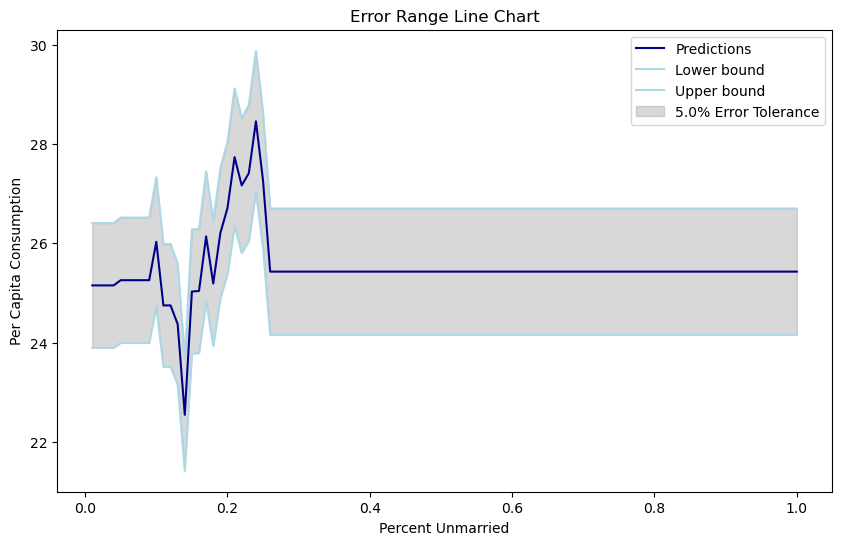

In [4]:

# Extract columns for X-axis, Y-axis, and error range bounds
x_values = data['Percentage']  # Replace 'X-axis' with the actual column name for X-axis data
y_values = data['Predicted_Value']  # Replace 'Y-axis' with the actual column name for Y-axis data

tolerance = 0.05
lowerY = data['Predicted_Value'] * (1 - tolerance)
upperY = data['Predicted_Value'] * (1 + tolerance)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Predictions', color = 'darkblue')
plt.plot(x_values, lowerY, label='Lower bound', color = 'lightblue')
plt.plot(x_values, upperY, label='Upper bound', color = 'lightblue')
plt.fill_between(x_values, lowerY, upperY, color='gray', alpha=0.3, label=f'{tolerance*100}% Error Tolerance')
#plt.fill_between(x_values, lower_bound, upper_bound, alpha=0.3, label='Error Range')

# Customize labels and title
plt.xlabel('Percent Unmarried')
plt.ylabel('Per Capita Consumption')
plt.title('Error Range Line Chart')
plt.legend()

# Show the plot
plt.show()